we will predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note.
<br>The attributes are below:

* Variance of wavelet transformed image, 
* curtosis of the image, 
* entropy, and 
* skewness of the image</br>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics

import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('bill_authentication.csv')

In [7]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [10]:
x=data[data.columns.difference(['Class'])]
x.head(3)

,Curtosis,Entropy,Skewness,Variance
0,-2.8073,-0.44699,8.6661,3.6216
1,-2.4586,-1.46210,8.1674,4.5459
2,1.9242,0.10645,-2.6383,3.8660


In [11]:
y=data['Class']
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

#### Local Functions 

In [12]:
def train_test_data(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
    print("Size of training Dataset: ",len(x_train))
    print("Size of test Dataset: ",len(x_test))
    return x_train,x_test,y_train,y_test

In [13]:
def tree_building(x,y,criteria):
    tree = DecisionTreeClassifier(criterion=criteria)
    fitted_tree = tree.fit(x,y)
    return fitted_tree

In [14]:
def predict_class(tree,x):
    y_pred = tree.predict(x)
    return y_pred

In [15]:
def calculate_score(x,y_true,y_pred,tree):
    print("Accuracy Score :",metrics.accuracy_score(y_true,y_pred))
    print("Score :",tree.score(x,y_true))
    

In [16]:
def create_confusion_matrix(y_true,y_pred):
    print(metrics.confusion_matrix(y_true,y_pred))

In [17]:
def create_class_report(y_true,y_pred):
    print(metrics.classification_report(y_true,y_pred))

#### Decision Tree using Gini criterion

In [18]:
x_train,x_test,y_train,y_test = train_test_data(x,y)
gini_tree = tree_building(x_train,y_train,'gini')

print("\nPredicting for train dataset\n")
y_train_pred = predict_class(gini_tree,x_train)

print("Predicting for test dataset\n")
y_test_pred = predict_class(gini_tree,x_test)

print("Calculating Score for train dataset : \n")
calculate_score(x_train,y_train,y_train_pred,gini_tree)

print("\n Calculating Score for test dataset : \n")
calculate_score(x_test,y_test,y_test_pred,gini_tree)

print("\n Confusion Matrix: ")
create_confusion_matrix(y_test,y_test_pred)

print("\n Classification Report: ")
create_class_report(y_test,y_test_pred)

Size of training Dataset:  960
Size of test Dataset:  412

Predicting for train dataset

Predicting for test dataset

Calculating Score for train dataset : 

Accuracy Score : 1.0
Score : 1.0

 Calculating Score for test dataset : 

Accuracy Score : 0.9927184466019418
Score : 0.9927184466019418

 Confusion Matrix: 
[[238   0]
 [  3 171]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       238
           1       1.00      0.98      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



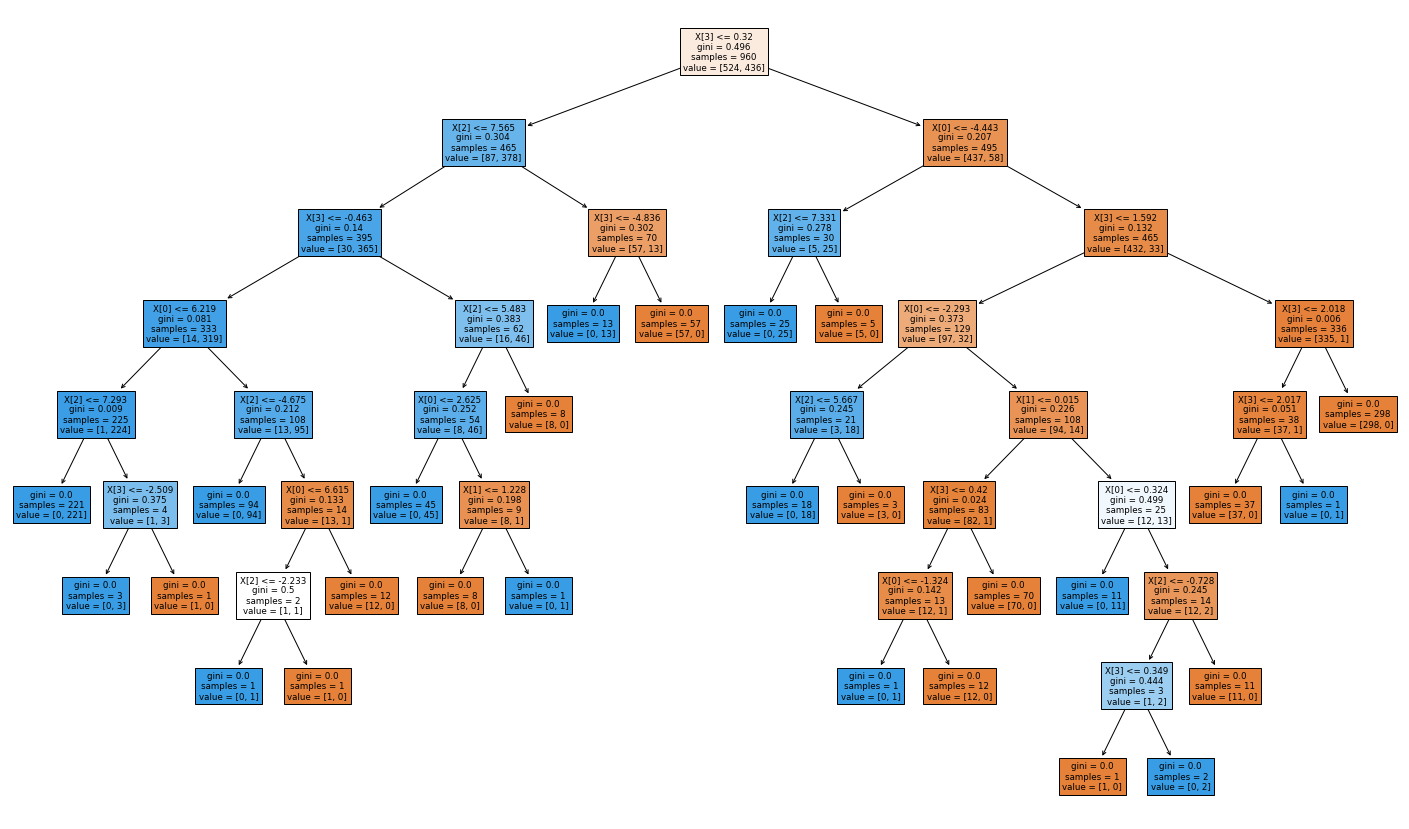

In [22]:
from sklearn.tree import plot_tree

fig=plt.figure(figsize=(25,15))
_ = plot_tree(gini_tree,filled=True)

#### Decision Tree using Entropy Criterion

In [23]:
entropy_tree = tree_building(x_train,y_train,'entropy')

print("Predicting for Train Dataset")
y_train_pred = predict_class(entropy_tree,x_train)

print("\n Predicting for Test Dataset")
y_test_pred = predict_class(entropy_tree,x_test)

print("\nCalculating score for train dataset: ")
calculate_score(x_train,y_train,y_train_pred,entropy_tree)

print("\n Calculating score for test dataset: ")
calculate_score(x_test,y_test,y_test_pred,entropy_tree)

print("\n Confusion Matrix: ")
create_confusion_matrix(y_test,y_test_pred)

print("\n Classification Report: ")
create_class_report(y_test,y_test_pred)

Predicting for Train Dataset

 Predicting for Test Dataset

Calculating score for train dataset: 
Accuracy Score : 1.0
Score : 1.0

 Calculating score for test dataset: 
Accuracy Score : 0.9951456310679612
Score : 0.9951456310679612

 Confusion Matrix: 
[[237   1]
 [  1 173]]

 Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       0.99      0.99      0.99       174

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



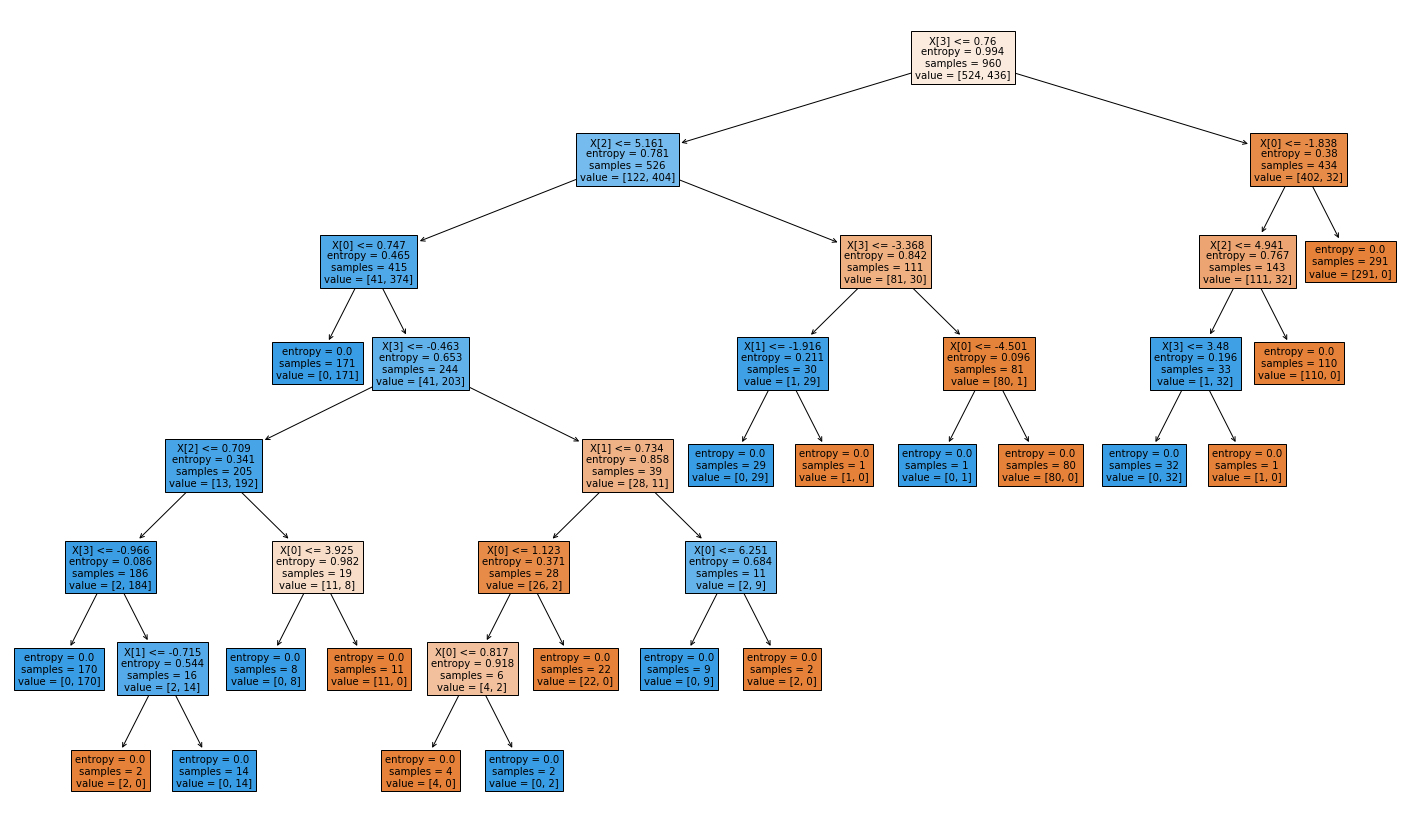

In [24]:
fig=plt.figure(figsize=(25,15))
_ = plot_tree(entropy_tree,filled=True)